# ECON 326: Introduction to Basic Statistics using Jupyterlab


## Authors
* Emrul Hasan (ehasan@mail.ubc.ca)
* Jonah Heyl (jonah.heyl@ubc.ca)
* Shiming Wu (shiming.wu@ubc.ca)

## Prerequisites
* Introduction to r notebook
* Introduction to jupyter lab notebook



## Outcomes
In this worksheet, you will learn:

* How to import data into r
* Get descriptive statistics from data
* How to make plots
* How to perform a t-test



# Part 1: Introduction to R and Jupyter


In this tutorial, we will be working with some real-world data: the 2019 Survey of Financial Security, provided by Statistics Canada[<sup id="fn1s">1</sup>](#fn1). First, we will import data into our notebook. We are going to give brief review of some of the features of R (feel free to skip this or review the introduction notebooks for more details).
In R, we import data using different commands, which are stored in **libraries** that other developers of R have created for us.  Let's import some of the most important libraries now.  

We can do this in a Jupyter notebook by selecting a cell and hitting "shift+enter" or by pressing the "play" button in the menu.
* *Important*: information is shared across cells in a notebook.  However, cells run independently; so, if you run a later cell it doesn't re-evaluate previous cells.  You have to re-run them before you can use the results.  You can re-run all the cells in a notebook with the "fast forward" button.

Try loading some of the packages into memory by running the following cell.

In [1]:
# Run this cell to evaluate the code
 
library(tidyverse)
library(haven)
library(dplyr)
library('scales')

source("functions1.r")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




You have now imported the packages into memory, and they are available to use in subsequent cells.  You may also see some output, which tells you about how they have been imported.

As an aside, in this course we try (as much as possible) to use R packages which are part of the [tidyverse](https://www.tidyverse.org/) family of packages.  This is because they are well-supported, consistent, and commonly used in data sciences.  There are (usually) other packages that provide similar functions.



## Importing Data into R

The first step in an econometric project is to import, tidy, and examine your data.  For this project, we will be using data from the 2019 Survey of Financial Security (SFS), provided by Statistics Canada (see the license notes).  This is _real data_ on real Canadians.

In this course, we will always work with data that is **tidy**.  This is a data-science term that refers to data with a particular format or shape.  Specifically, tidy data is rectangular data in which:
* Each row represents one observation
* Each column represents a single variable

You can imagine this as a spreadsheet in a program like Excel.  This is the way most statistical programs like to recieve data - but it _isn't_ a property of the data itself.  It is only a representation; there can be other kinds of representations.  For example, a panel dataset might have each row as a unit (e.g. country) and each column might represent a variable in a year (e.g. unemployment in 2016, unemployment in 2017, etc.).  Often, when we work with real-world data we have to reshape it in order for it to be usable - but in this course, we won't worry about that.

Data comes in many different formats, which must be interpreted by our statistical programs.  Essentially, we need to tell them what the data means.  This is referred to as **importing** data.  There are different techniques for importing data in different formats; for example:

* Importing data from a ```.dta``` file: this is data that was created by the statistical software STATA and is commonly used in economics.
* Importing data from a delimited text file: this is data which is in a text format, but where the columns are *delimited* or seperated by a special character.  For example, the ```.csv``` (comma-separated variable) format is text, but where the columns are separated by a comma.

Each of these formats has a special **method** associated with it.  Methods are commands, stored in R packages, that tell R to do things.  In fact, you're already seen one!  The ```library(...)``` method imports whatever package is in the brackets into memory.

Let's start by importing our ```.dta``` file into memory, using the ```read_dta``` method.  When we read things into memory, we normally want to use them later, so we have to give them a name.  Let's call this ```SFS_data``` so we can refer to it later on:

In [2]:
# read the file named "SFS_2019_Eng.dta" into memory, and assign it to the object SFS_data
SFS_data <- read_dta("../datasets/SFS_2019_Eng.dta")

## Viewing and Inspecting Data

After we have imported our data, the next important task is to inspect and view it, so that we can understand its structure.  R offers several different ways to do this. We will learn three of these commands:

* ```head(...)```
* ```print(...)```
* ```glimpse(...)```

This was already discussed introduction to r, so if you would like you can just try these methods out to see what each one does.

In [3]:
head(SFS_data)

pefamid pweight   pagemieg PAS1MRAG PAS1MRG1 PAS1MRG2 PASR1MFA PASR1MR
1 00001   4415.0772 06       NA       NA       NA       NA        2     
2 00002    805.4285 14       NA       NA       NA       NA       NA     
3 00003   1393.1613 12       NA       NA       NA       NA       NA     
4 00004    216.7353 11       NA       NA       NA       NA       NA     
5 00005    454.9928 11       NA       NA       NA       NA       NA     
6 00006   2935.6096 04       NA       NA       NA       NA        2     
  pasrbuyg pasrcnmg ⋯ pwdsloan pwdstcrd pwdstloc pwdstodb pwdstomr pwdstvhn
1  7       NA       ⋯     0      0       24000   0            0    47000   
2 NA       NA       ⋯     0      0           0   0            0        0   
3  4       NA       ⋯     0      0           0   0            0        0   
4  5        1       ⋯     0      0           0   0        87500        0   
5  5        2       ⋯     0      0      140000   0            0        0   
6  9       NA       ⋯ 22000    600       28000   0            0        0   
  pwdtotal pwnetwpg pwnetwpt verdate   
1 351000    511750   502750  28/06/2021
2      0     18250    18250  28/06/2021
3      0   8806000  8806000  28/06/2021
4  87500   2019000  2019000  28/06/2021
5 140000   4080100  4080100  28/06/2021
6 330600    160550   155050  28/06/2021

You can use the following command to know the detailed information of variables.

In [5]:
# If you want to know more about the variables, you can input the name in dictionary(). Sometimes you may need to compile 'source("functions2.r")' twice.
dictionary('pefatinc')

[1] "after-tax-income"

If you want to familiarize yourself with data run the next loop, which prints out a definition for each variable.

In [8]:
#for (word in names( SFS_data)) {
 #  print(word)
  # print(dictionary(word))
# }

Some important variables in this dataset:

* ```pefmtinc```: income_before_tax
* ```pefatinc```: income_after_tax
* ```pwnetwpg```: wealth
* ```pgdrmie```: gender
* ```peducmie```: education


### Accessing Variables and Data Frames

If you recall, this dataset is _tidy_ in that each observation is a row, and each column is a variable.  In R, datasets are called *data frames* - this particular one is a special type of data frame called a _tibble_ (like, table).  We don't need to get into too many details about data frames, but basically they collect and organize all of the variables and observations.  Many functions in R need information to be organized into a data frame so that it can be computed.  You will see examples of these later on.

One of the most important things to remember is that you can access the _variables_ in a dataframe in two ways:

1.  First, you can use the `$` operator to directly access the variables
2.  Second, within a command, you can tell the command what data you are working with, then refer to the variables by name.

For example, if we wanted to get the ``mean`` of ``pwnetwpg`` (wealth) (for some reason...) we could do it this way:

In [4]:
mean(SFS_data$pwnetwpg)

[1] 1029539

This says get the variable ``pwnetwpg`` from the dataframe ``SFS_data``, then compute the mean.  In a command like ``filter`` you can tell the command to work with the data, and then refer to the variables just by their name.  

In [5]:
SFS_data <- filter(SFS_data, !is.na(SFS_data$pefmtinc))  #here we filter out the observations where before tax income is missing (or is a NA)

In [6]:
SFS_data <- rename(SFS_data, income_before_tax = pefmtinc) #Finally, we can rename columns, to be more meaningfull names, this is not nessary but is generally a good practice
SFS_data <- rename(SFS_data, income_after_tax = pefatinc)
SFS_data <- rename(SFS_data, wealth = pwnetwpg)
SFS_data <- rename(SFS_data, gender = pgdrmie)
SFS_data <- rename(SFS_data, education = peducmie)

# Part 2: Hands on the Wealth Gap in Female and Male Lead Households

Now we can get started on our analysis. There is a common discussion in laymen press, economics and political sciences, which is the gender inequality. Females are an important part of workforce. But studies show that there is gender income gap and gender wealth gap. What factors contribute to the gender gap? Here we are going to explore the wealth gap between male lead households and female lead households (a male lead households is a household in which  a male earns the majority of the income). 

The first question we should ask is: is there a significant gap between male lead household wealth and female lead household wealth? A different way to ask this, is given our data, what percent of the time would we except this gap to appear randomly? This describes a p-value, so first we will perform a t-test, to get this value. Now if this p-value indicates a significant gap in wealth, we can go on to ask what is causing this wealth gap.

At a high level, there are only a few things that can cause this wealth gap:

1. difference in income between male and female lead household,  

2. female lead households and male lead household, different saving and investment habits. For instance male lead households might take on more risk, or holds less cash than female lead households. 

3. female lead households inherit less wealth (regardless of income), or 

4. female lead households face additional obstacles in regard to building wealth, for instance access to credit.

It's important to note that these factors are not mutual exclusive (for instance female lead household earn less could have an effect and inheritance could have an effect as well).

We will be going through this topic for the next three modules, in this one will see if there is a significant wealth gap, and what causes it, which may involve investigating the income gap, between male and female lead households.

First, we're going to compute the average family wealth. Then we compute the average family wealth conditional on being a female lead household vs a male lead households. Next we will do a t-test to see if the wealth gap is significant. Finally, we will briefly investigate what is causing the wealth gap.

In [7]:
mean(SFS_data$wealth) #this compute the sample mean of wealth from the SFS_data set

[1] 1030591


We need to tell R that our variables are actually qualitative (factor) variables, so they are easier to read.  Let's try that now using the ``as_factor`` function. This function automatically translates labelled values into factor variables.  Compare the results above with the new dataset below.

In [8]:
SFS_data<-SFS_data[!(SFS_data$education=="9"),]
SFS_data$education <- as.numeric(SFS_data$education)
SFS_data <- SFS_data[order(SFS_data$education),]
SFS_data$education <- as.character(SFS_data$education)
SFS_data$education[SFS_data$education == "1"] <- "Less than high school" 
SFS_data$education[SFS_data$education == "2"] <- "High school"
SFS_data$education[SFS_data$education == "3"] <- "Non-university post-secondary"
SFS_data$education[SFS_data$education == "4"] <- "University"

In [9]:
SFS_data$gender <- as_factor(SFS_data$gender) # this swaps gender to be male or female rather than 0 or 1
SFS_data$education <- as_factor(SFS_data$education)

## Computing the Wealth Gap

We will first describe the gender wealth gap. In R, there are many ways we could compute basic descriptive statistics.  The simplest way is to use ``summarize`` and ``group_by``:

In [10]:
# Next we look at wealth for households with men and women as main earners
results <- 
    SFS_data %>% 
    group_by(gender) %>%
    summarize(m_wealth = mean(wealth), sd_wealth = sd(wealth))

results 

gender m_wealth  sd_wealth
1 Male   1128033.5 1875387  
2 Female  892747.9 1524154

> **Advanced Note**: _piping_ The above example uses a special R command called a **pipe** (``%>%``).  Mechanically, what piping does is insert the object before the pipe into the object after the pipe.  For example, if we have ``z <- f(x,y)`` we could write this using pipes as ``z <- x %>% f(y)``.  Piping is really most useful when you are chaining (piping) a series of commands together.  You can think of a pipe as saying _and then_ followed by a command.  The item before the pipe will be inputted into the next command.  This lets you do complex data manipulation in a way with is readable.
> For example, the command above (i) starts with ``SFS_data`` (ii) groups it by ``gender``, (iii) takes the grouped data and summarizes it.  If we wrote this without using a pipe it would look like:
> ``summarize(group_by(SFS_data,gender), m_wealth = mean(wealth), sd_wealth = sd(wealth))``


We can also visualize this, using ``ggplot2``, which can create bar graphs and other visualizations.  Here's a bar graph and a boxplot.

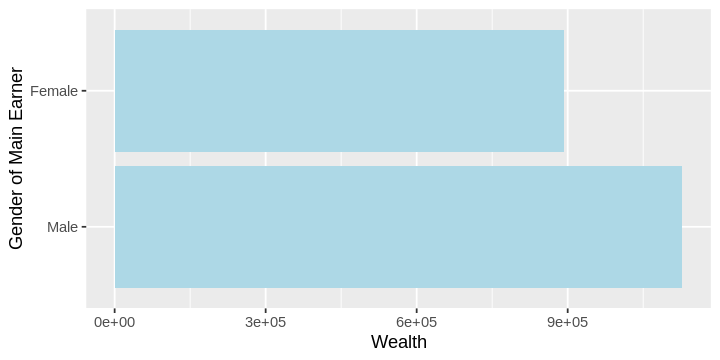

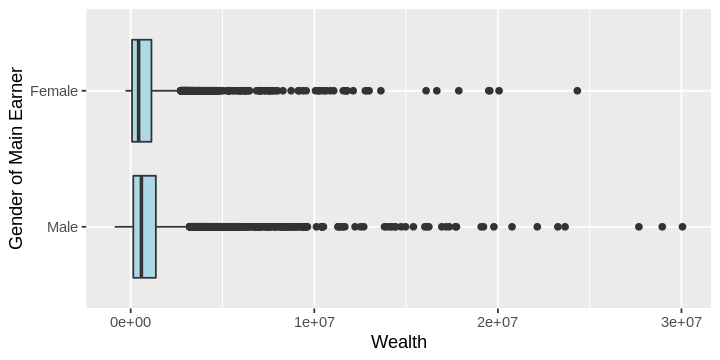

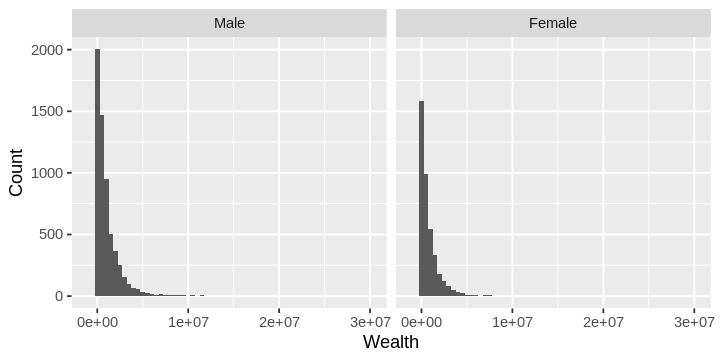

In [11]:
f <- ggplot(data = SFS_data, aes(x = gender, y = wealth)) + xlab("Gender of Main Earner") + ylab("Wealth")
f1 <- f + geom_bar(stat = "summary", fun = "mean", fill = "lightblue") #produce a summary statistic, the mean
f1 <- f1 + coord_flip() #make a horizontal bar graph!

options(repr.plot.width=6,repr.plot.height=3) #this controls the size; you can change 6 and 3 to look better

f2 <- f + geom_boxplot(fill = "lightblue") + coord_flip()

f3 <- ggplot(data = SFS_data, aes(x = wealth)) + geom_histogram(binwidth = 500000) + xlab("Wealth") + ylab("Count") + facet_grid(. ~ gender)

f1
f2
f3

> _Think Deeper:_ What does this tell you about the distribution of wealth in these datasets?  Could this be a problem for our analysis?

This is all interesting to think about.  However, this is not a formal test of the gender-wealth gap.  We need to examine this from a statistical perspective.  We can do this using a $t$-test.  This can be performed using the ``t.test`` command:

In [12]:
t1 = t.test(
       x = filter(SFS_data, gender == "Male")$wealth,
       y = filter(SFS_data, gender == "Female")$wealth,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)

t1 

round(t1$estimate[1] - t1$estimate[2],2) 


	Welch Two Sample t-test

data:  filter(SFS_data, gender == "Male")$wealth and filter(SFS_data, gender == "Female")$wealth
t = 6.9324, df = 9710.4, p-value = 4.401e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 168756.2 301815.0
sample estimates:
mean of x mean of y 
1128033.5  892747.9 


mean of x 
 235285.6

This particular $t$-test was for a 95% confidence level. The gender-wealth gap is 235,285.6 dollars. As you can see, there is a significant gap in wealth between male and female lead households.

## Going Deeper: 
> ***What are the causes of the gender-wealth gap in Canada?***

The next step is to understand why or how the gender wealth gap might exist. The natural potential factors to study are education and incomes. For example, perhaps females are less likely to have university degree, or perhaps females earn less incomes.  These reasons could, potentially, create a gender wealth gap.  Let's take a look at education in the survey, then try to understand how it interacts with gender:

In [13]:
# Next we look at wealth for households with different education
results <- 
    SFS_data %>% 
    group_by(education) %>%
    summarize(m_wealth = mean(wealth), sd_wealth = sd(wealth))

results 

education                     m_wealth  sd_wealth
1 Less than high school          535499.2 1319340  
2 High school                    788263.7 1449500  
3 Non-university post-secondary  842493.1 1519448  
4 University                    1481145.5 2061947

The results suggest average wealth increases with education of the main earner. 

> _Think Deeper:_ Why might this be the case?  

We also see how this breaks down by gender.  Look at the following table - do you see a pattern?

`summarise()` has grouped output by 'education'. You can override using the `.groups` argument.



education                     gender m_wealth  sd_wealth
1 Less than high school         Male    587457.9 1174738  
2 Less than high school         Female  448290.9 1529116  
3 High school                   Male    840156.9 1513918  
4 High school                   Female  702158.5 1332181  
5 Non-university post-secondary Male    901916.2 1521343  
6 Non-university post-secondary Female  747951.4 1512318  
7 University                    Male   1680511.1 2346053  
8 University                    Female 1213003.7 1563383

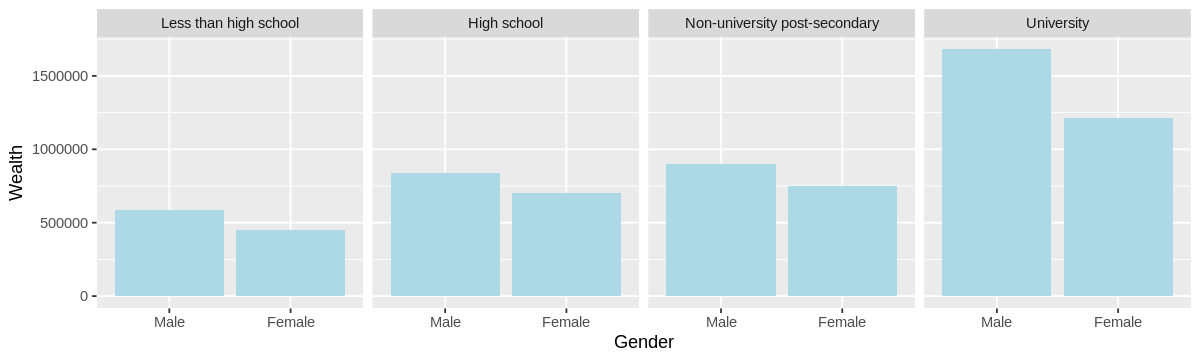

In [23]:
results <- 
    SFS_data %>%
    group_by(education,gender) %>% 
    summarize(m_wealth = mean(wealth), sd_wealth = sd(wealth))

results

options(repr.plot.width=10,repr.plot.height=3)

f <- ggplot(data = SFS_data, aes(x = gender, y = wealth)) + xlab("Gender") + ylab("Wealth")
f <- f + geom_bar(stat = "summary", fun = "mean", fill = "lightblue") #produce a summary statistic, the mean
f <- f + facet_grid(. ~ education) #add a grid by education

f

You can see that female-lead households tend to accumulate less wealth than the male counterpart.  

However, it is worthwhile to look at the difference in wealth gap in percent terms rather than, absolute terms. This is because people at a higher education level earn more so the gap may appear deceptively larger. ``percentage_table`` is a 'function', which takes `result`, name of `column1` and name of `column3` of `results` table that we summarized as inputs. We assign this function to the object `percentage_table`, and produce the table we want. 

In [30]:
percentage_table <- function(result,column1,column3) {
#gap in percentage: (wealth_male - wealth_female)/wealth_female
female_wealth=filter(result,gender=='Female')[[column3]]
male_wealth=filter(result,gender=='Male')[[column3]]
wealth_gap= (male_wealth-female_wealth)/female_wealth
education=filter(result,gender=='Female')[[column1]]
gap= data.frame(education,wealth_gap)
wealth_gap<-percent(gap$wealth_gap) #show in percentage form
gap$wealth_gap<-as.character(gap$wealth_gap)
gap$wealth_gap<-wealth_gap
return(gap)
}

Let's call `percentage_table` and use `results` generated in previous cell (the $8\times 4$ table) as the inputs. The following table is the average percentage of wealth which shows a male-lead household accumulates more than a female-lead household.

In [25]:
percentage_table(result=results, column1="education", column3="m_wealth")

education                     wealth_gap
1 Less than high school         31.04%    
2 High school                   19.65%    
3 Non-university post-secondary 20.58%    
4 University                    38.54%

From the results above, family with male as main earner generally accumulates more wealth than female-lead household which has similar education background. The gender-wealth gap is widest for university graduates, with male-lead family has 38.54% more wealth than female-lead family. We can make this even more clear by adding a new variable (``university``) to our dataset.  Frequently, we will want to make new variables to help us analyze the results, especially when a variable is more complicated than we would like it to be.

You can create this in many ways - but a very useful command is the ``case_when`` command.  Here is an example for our ``university`` variable.  Pay attention to the use of the ``as_factor`` command at the end to tell R that this is still a qualitative variable.



In [26]:
SFS_data <- SFS_data %>% 
               mutate( 
               university = case_when(#this is an example of this function
                     education == "University" ~ "Yes", #the ~ seperates the original from the new name
                     education == "Non-university post-secondary" ~ "No",
                     education == "High school" ~ "No",
                     education == "Less than high school" ~ "No")) %>%
             mutate(university = as_factor(university)) #remember, it's a factor!

glimpse(SFS_data$university)

 Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...


Now, let's repeat the analysis we did above by education status; then we can perform a $t$-test on each of these sub-groups:

`summarise()` has grouped output by 'university'. You can override using the `.groups` argument.



university gender m_wealth  sd_wealth
1 No         Male    818279.2 1461872  
2 No         Female  674883.3 1457515  
3 Yes        Male   1680511.1 2346053  
4 Yes        Female 1213003.7 1563383

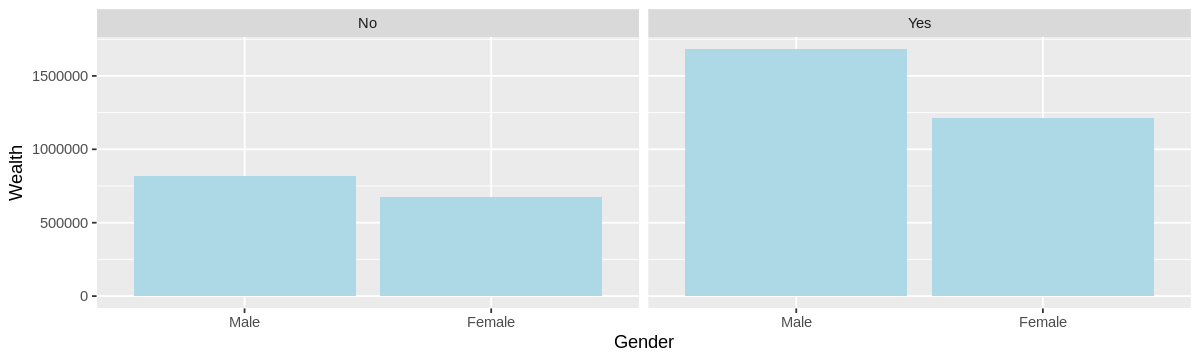

In [27]:
results <- 
    SFS_data %>%
    group_by(university,gender) %>%
    summarize(m_wealth = mean(wealth), sd_wealth = sd(wealth))

results 

f <- ggplot(data = SFS_data, aes(x = gender, y = wealth)) + xlab("Gender") + ylab("Wealth")
f <- f + geom_bar(stat = "summary", fun = "mean", fill = "lightblue") #produce a summary statistic, the mean
f <- f + facet_grid(. ~ university) #add a grid by education

f

Similarly, let's look at the difference in wealth gap in percent terms. We use `results` generated in previous cell (the $4\times 4$ table) as the inputs this time.

In [28]:
percentage_table(result=results, column1="university", column3="m_wealth")

education wealth_gap
1 No        21%       
2 Yes       39%

Without university degree, male-lead households accumulate 21% more wealth than female counterpart, while with university degree, the gap is widen to 39%. Thus education seems to enlarge the gender-wealth gap.

Let's study gender wealth gap within subsamples of "university degree" and "no university degree" respectively by running formal two sample t-test in the 2 subsamples.

In [29]:
university_data = filter(SFS_data, university == "Yes") #university only data 
nuniversity_data = filter(SFS_data, university == "No") #not university data

t2 = t.test(
       x = filter(university_data, gender == "Male")$wealth,
       y = filter(university_data, gender == "Female")$wealth,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)

t2  #test for the wealth gap in university data

round(t2$estimate[1] - t2$estimate[2],2)


t3 = t.test(
       x = filter(nuniversity_data, gender == "Male")$wealth,
       y = filter(nuniversity_data, gender == "Female")$wealth,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)

t3 #test for the wealth gap in non-university data

round(t3$estimate[1] - t3$estimate[2],2)


	Welch Two Sample t-test

data:  filter(university_data, gender == "Male")$wealth and filter(university_data, gender == "Female")$wealth
t = 7.3872, df = 3782.4, p-value = 1.836e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 343428.9 591586.0
sample estimates:
mean of x mean of y 
  1680511   1213004 


mean of x 
 467507.5


	Welch Two Sample t-test

data:  filter(nuniversity_data, gender == "Male")$wealth and filter(nuniversity_data, gender == "Female")$wealth
t = 3.7902, df = 5082.4, p-value = 0.0001523
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  69225.74 217566.06
sample estimates:
mean of x mean of y 
 818279.2  674883.3 


mean of x 
 143395.9

Consider the results above.  Do you think the results of Welch Two Sample t-test are consistent with the above descriptive results?

> _Think Deeper_: How can you explain the effects of education on gender-wealth gap? What would you need to know in order to rationalize your explanation?  

### Wrapping Up

At this point, we have started to explore the gender wealth gap.  Next, work on the following exercises to learn more. We will touch on the second important factor: income.

# Part 3: Exercises

### Activity 1 
First, examine ``SFS_data`` with a focus on before-tax income. Create a table that tabulates the average before-tax income by gender. A correct ``tab_income`` table will pass the test.  Try looking at how we generated some of the earlier tables for inspiration, if you need a hint.

In [31]:
tab_income <- #fill in the code below; what goes before the %>%?
    SFS_data %>% 
    group_by(gender) %>%
    summarize(m_income = mean(income_before_tax), sd_income = sd(income_before_tax))

tab_income

answer1 <- tab_income
test_1() #quiz 1

gender m_income  sd_income
1 Male   109613.58 142974.31
2 Female  75269.41  89658.98

Test passed 🥇
[1] "Success!"


#### Short Answer 1:

What type of variable is ``gender``? Does it make sense to have ``gender`` as that variable type? Why or why not?  Write your answer in the box below:

<font color="red">Answer here (delete this text)</font>

Answer: `gender` is factor. It makes sense to have `gender` to be factor, because the variable is displayed clearly to be either 'male' or 'female', and in the next chapter, you will notice that if a variable is a factor, R can handle this qualitative variable as 'dummies' properly, which is very neat.

### Activity 2

The table that we got in the previous activity is fairly clear, but let's illustrate things with a chart. Construct a bar graph that charts the average income before tax by gender. ``income_graph`` will store this plot. You can see it by running the second code chunk below.

In [32]:
SFS_data$gender <- haven::as_factor(SFS_data$gender)
income_graph <- ggplot(data = SFS_data, aes(x = gender, y = income_before_tax)) + xlab("Gender") + ylab("Income before tax")  #what goes in the x = spot?  what goes in xlab("")?
income_graph <- income_graph + geom_bar(stat = "summary", fun = mean, fill = "lightblue")
income_graph <- income_graph + coord_flip()

Don't know how to automatically pick scale for object of type haven_labelled/vctrs_vctr/double. Defaulting to continuous.



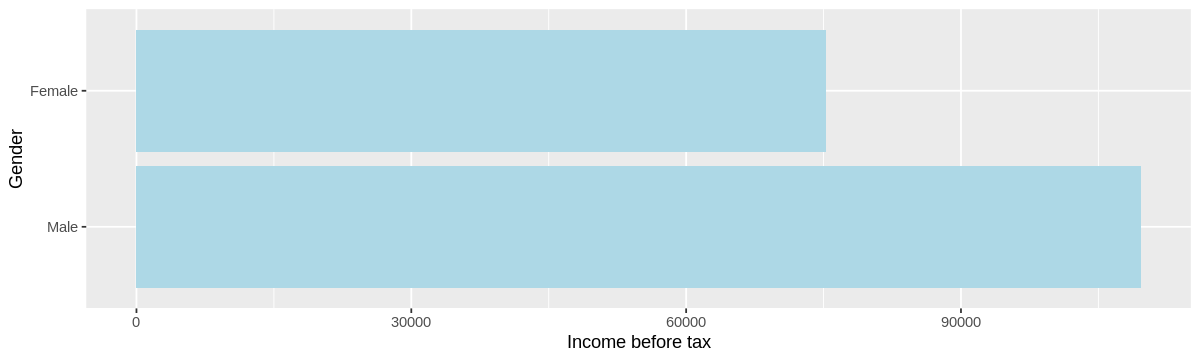

In [33]:
income_graph

#### Short Answer 2
Examine the graph.  What do we observe when we compare the average before-tax income between genders? What does this suggest?

<font color="red">Answer here (delete this text)</font>

Answer: Male-lead households have higher before-tax income on average. This suggests higher income may be a reason why male-lead households accumulate more wealth in general.

### Activity 3
Now, create a table that tabulates average before-tax income by education level and gender. This table, labelled ``tab_income2``, will be tested for correctness.

In [34]:
tab_income2 <- 
    SFS_data %>%
    group_by(education,gender) %>% 
    summarize(m_income = mean(income_before_tax), sd_income = sd(income_before_tax))

tab_income2

answer2 <- tab_income2
test_2() #quiz 2

`summarise()` has grouped output by 'education'. You can override using the `.groups` argument.



education                     gender m_income  sd_income
1 Less than high school         Male    47140.72  58439.74
2 Less than high school         Female  23477.31  70538.04
3 High school                   Male    81191.49  78901.52
4 High school                   Female  51472.26  63750.58
5 Non-university post-secondary Male    99335.89  79740.78
6 Non-university post-secondary Female  65724.20  86372.51
7 University                    Male   157819.15 205913.19
8 University                    Female 108537.15  95725.67

Test passed 😀
[1] "Success!"


Next, create table of percentage that compares average income gap between males and females within education levels (``tab_income_percent`` will store this). Note that most of the syntax is provided -- you simply need to fill in the missing code.

In [40]:
tab_income_percent <- percentage_table(result=tab_income2, column1="education", column3="m_income")
tab_income_percent

education                     wealth_gap
1 Less than high school         100.8%    
2 High school                   57.7%     
3 Non-university post-secondary 51.1%     
4 University                    45.4%

#### Short Answer 3
Examine the table. What do we observe when we compare the before-tax income gap between education levels? What does this suggest? And if you compare the income gap table with wealth gap table (percentage), what do you find?

<font color="red">Answer here (delete this text)</font>

Answer: The gender-income gap is widest among households with education less than high school, and decreases as education increases. The absolute value of gender-income gap increases with education. $\text{percentage gap}=\frac{\text{male income} - \text{female income}}{\text{female income}}$. So the percentage gap decreases with education is because the denominator increases.
If we compare the before-tax income gap with wealth gap, we notice that the wealth gap is smaller than the income gap, which may come from the effects of tax or investment and saving behavior difference between males and females.

### Activity 4
Economists are often concerned with two aspects of the relationship between male and female lead households  and education:
* Difference in average income between the two household groups
* The difference in returns to education between the two household groups

Let's explore these two topics. First, test whether there are significant differences in income before tax between male and female lead households within each education group. Within which education levels do we see significant differences 

_Note_: You will perform the t-test's of gender income gap on each education group.

In [36]:
#Less than high school 
tlesshs = t.test(
       x = filter(SFS_data, (gender == "Male" & education=='Less than high school'))$income_before_tax,
       y = filter(SFS_data, (gender == "Female" & education=='Less than high school'))$income_before_tax,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)

tlesshs

#High school 

ths = t.test(
       x = filter(SFS_data, (gender == "Male" & education=='High school'))$income_before_tax,
       y = filter(SFS_data, (gender == "Female" & education=='High school'))$income_before_tax,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)


round(ths$estimate[1] - ths$estimate[2],2)
ths
test_3() #quiz 3



# Non-uni post-seconary

tsocol = t.test(
       x = filter(SFS_data, (gender == "Male" & education=='Non-university post-secondary'))$income_before_tax,
       y = filter(SFS_data, (gender == "Female" & education=='Non-university post-secondary'))$income_before_tax,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)

tsocol

#University

tuni = t.test(
       x = filter(SFS_data, (gender == "Male" & education=='University'))$income_before_tax,
       y = filter(SFS_data, (gender == "Female" & education=='University'))$income_before_tax,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)

tuni
round(tuni$estimate[1] - tuni$estimate[2],2)
test_4() #quiz 4





	Welch Two Sample t-test

data:  filter(SFS_data, (gender == "Male" & education == "Less than high school"))$income_before_tax and filter(SFS_data, (gender == "Female" & education == "Less than high school"))$income_before_tax
t = 6.0219, df = 817.85, p-value = 2.602e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 15950.2 31376.6
sample estimates:
mean of x mean of y 
 47140.72  23477.31 


mean of x 
 29719.23


	Welch Two Sample t-test

data:  filter(SFS_data, (gender == "Male" & education == "High school"))$income_before_tax and filter(SFS_data, (gender == "Female" & education == "High school"))$income_before_tax
t = 9.8409, df = 2092, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 23796.77 35641.70
sample estimates:
mean of x mean of y 
 81191.49  51472.26 


Test passed 🎉
[1] "Success!"



	Welch Two Sample t-test

data:  filter(SFS_data, (gender == "Male" & education == "Non-university post-secondary"))$income_before_tax and filter(SFS_data, (gender == "Female" & education == "Non-university post-secondary"))$income_before_tax
t = 10.358, df = 2172, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 27248.02 39975.37
sample estimates:
mean of x mean of y 
 99335.89  65724.20 



	Welch Two Sample t-test

data:  filter(SFS_data, (gender == "Male" & education == "University"))$income_before_tax and filter(SFS_data, (gender == "Female" & education == "University"))$income_before_tax
t = 9.8699, df = 3281.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 39491.99 59072.01
sample estimates:
mean of x mean of y 
 157819.1  108537.1 


mean of x 
    49282

Test passed 😀
[1] "Success!"


### Activity 5
Next, examine whether returns to education differ between genders. For our purposes, we will define:
> **Returns to Education**: The difference in average income before tax between two subsequent education levels.

Run this test for the returns to education of: 
* High school diploma (relative to less than high school) and 
* University degree (relative to non-university post-secondary)

*The following t-test objects will be tested for correctness:* Returns to education of a high school diploma for males (``retHS``) and for females(``retHSF``), and returns to education of a university's degree for males (``retU``) and for females (``retUF``).

In [37]:
#Returns to education: High school diploma

##Males

retHS = t.test(
       x = filter(SFS_data, (gender == "Male" & education=='Less than high school'))$income_before_tax,
       y = filter(SFS_data, (gender == "Male" & education=='High school'))$income_before_tax,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)#what goes here?

retHS
round(retHS$estimate[2] - retHS$estimate[1],2)

test_5() 

##Females

retHSF = t.test(
       x = filter(SFS_data, (gender == "Female" & education=='Less than high school'))$income_before_tax,
       y = filter(SFS_data, (gender == "Female" & education=='High school'))$income_before_tax,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)#what goes here?

retHSF
round(retHSF$estimate[2] - retHSF$estimate[1],2)

test_6() #quiz 6


	Welch Two Sample t-test

data:  filter(SFS_data, (gender == "Male" & education == "Less than high school"))$income_before_tax and filter(SFS_data, (gender == "Male" & education == "High school"))$income_before_tax
t = -11.44, df = 1968.1, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -39888.30 -28213.26
sample estimates:
mean of x mean of y 
 47140.72  81191.49 


mean of y 
 34050.78

Test passed 🥳
[1] "Success!"



	Welch Two Sample t-test

data:  filter(SFS_data, (gender == "Female" & education == "Less than high school"))$income_before_tax and filter(SFS_data, (gender == "Female" & education == "High school"))$income_before_tax
t = -7.0649, df = 846.02, p-value = 3.359e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -35772.52 -20217.37
sample estimates:
mean of x mean of y 
 23477.31  51472.26 


mean of y 
 27994.95

Test passed 🌈
[1] "Success!"


In [38]:
#Returns to education: University

##Males

retU = t.test(
       x = filter(SFS_data, (gender == "Male" & education=='Non-university post-secondary'))$income_before_tax,
       y = filter(SFS_data, (gender == "Male" & education=='University'))$income_before_tax,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)#what goes here?

retU
round(retU$estimate[2] - retU$estimate[1],2)

test_7() 

##Females

retUF = t.test(
       x = filter(SFS_data, (gender == "Female" & education=='Non-university post-secondary'))$income_before_tax,
       y = filter(SFS_data, (gender == "Female" & education=='University'))$income_before_tax,
       alternative = "two.sided",
       mu = 0,
       conf.level = 0.95)#what goes here?

retUF
round(retUF$estimate[2] - retUF$estimate[1],2)

test_8() #quiz 8


	Welch Two Sample t-test

data:  filter(SFS_data, (gender == "Male" & education == "Non-university post-secondary"))$income_before_tax and filter(SFS_data, (gender == "Male" & education == "University"))$income_before_tax
t = -12.197, df = 2971.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -67884.72 -49081.79
sample estimates:
mean of x mean of y 
 99335.89 157819.15 


mean of y 
 58483.26

Test passed 😸
[1] "Success!"



	Welch Two Sample t-test

data:  filter(SFS_data, (gender == "Female" & education == "Non-university post-secondary"))$income_before_tax and filter(SFS_data, (gender == "Female" & education == "University"))$income_before_tax
t = -12.123, df = 2485.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -49737.98 -35887.93
sample estimates:
mean of x mean of y 
  65724.2  108537.1 


mean of y 
 42812.95

Test passed 😸
[1] "Success!"


#### Short Answer 4
**Reflect on your analysis:** Interpret the results of the t-tests above. Are the returns to each level of education significant for males? For females? Comment on the difference between returns to education for a high school degree and that for a university degree.

<font color="red">Answer here (delete this text)</font>

Answer: Returns to each level of education are significant for males and females. We can see that incomes before tax increase as education increases.

#### Short Answer 5
**Discuss your results:** Do the returns to each level of education (for either level of education) differ between males and females? What differences between the two groups might explain this difference?

<font color="red">Answer here (delete this text)</font>

Answer: The returns to each level of education are higher for male-lead households. The gender-income gap of each level of education may come from gender difference in occupations and position levels.

### Activity 6
Now, let's repeat Activity 3 with after-tax income, i.e., create a table that tabulates average after-tax income by education level and gender. This table, labelled ``tab_income3``, will be tested for correctness.

In [41]:
tab_income3 <- 
    SFS_data %>%
    group_by(education,gender) %>% 
    summarize(m_income = mean(income_after_tax), sd_income = sd(income_after_tax))

tab_income3

answer3 <- tab_income3
test_9() #quiz 9

`summarise()` has grouped output by 'education'. You can override using the `.groups` argument.



education                     gender m_income  sd_income
1 Less than high school         Male    57361.48  42498.92
2 Less than high school         Female  38260.68  45443.04
3 High school                   Male    77059.86  54068.84
4 High school                   Female  57211.35  49067.68
5 Non-university post-secondary Male    89486.32  55516.09
6 Non-university post-secondary Female  66886.81  63822.91
7 University                    Male   127143.51 125313.06
8 University                    Female  94116.34  66916.47

Test passed 🌈
[1] "Success!"


Next, create table of percentage that compares average income gap between males and females within education levels (``tab2_income_percent`` will store this). Note that most of the syntax is provided -- you simply need to fill in the missing code.

In [42]:
tab2_income_percent <- percentage_table(result=tab_income3, column1="education", column3="m_income")
tab2_income_percent

education                     wealth_gap
1 Less than high school         49.92%    
2 High school                   34.69%    
3 Non-university post-secondary 33.79%    
4 University                    35.09%

#### Short Answer 6
Compare the above table with the one in Activity 3. What do you find and why? And if you compare the after-tax income gap table with wealth gap table (percentage), what do you find?

<font color="red">Answer here (delete this text)</font>

Answer: Compared with before-tax-income gap, the after-tax-income gap is smaller, which suggests redistribution in Canada effectively reduce income inequality.

The magnitude of gender-wealth gap is similar to gender-income(after tax) gap. This means wealth gap is more sensitive to after-tax income gap.

## Submitting Your Work
Each week, you will upload your workbook as *both a ``.ipynb`` and a PDF.* Below are instructions of how to do this:
* While viewing worksheet1, click on the ``File`` tab on the upper-left corner of the screen.
* From there, drag your cursor over ``Download as`` to see the formats that you can export the worksheet to.
* To export to a ``.ipynb``, click on _"Notebook (.ipynb)."_
* Next, to export to a PDF, navigate back to ``File`` > ``Download as`` and click on _"PDF via LaTeX."_
* Upload both of these files to Canvas through the Assignments tab, as you would any other assignment.

Once you have finished uploading both of these files, you have completed the hands-on activity -- well done!

<span id="fn1">[<sup>1</sup>](#fn1s)Provided under the Statistics Canada Open License (Public).  Adapted from Statistics Canada, Statistics Canada Open License (Public)
Adapted from Statistics Canada, 2021 Census Public Use Microdata File. This does not constitute an endorsement by Statistics Canada of this product.</span>